In [1]:
!pip install beautifulsoup4

In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
import pandas as pd 

import re

In [4]:
#Llamamos la url 
coches="https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2"
coches_llamada= requests.get(coches)

In [5]:
def estado_llamada():
    if coches_llamada.status_code != 200:
        print ("Error al realizar llamada")
        return None

In [6]:
#Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.

b'<!DOCTYPE html><html lang="es"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width, initial-scale=1"/><link rel="preload" href="/hera/_next/static/media/351a934e96d2300f-s.p.woff2" as="font" crossorigin="" type="font/woff2"/><link rel="preload" href="/hera/_next/static/media/e1c529c04de64b40-s.p.woff2" as="font" crossorigin="" type="font/woff2"/><link rel="preload" as="image" href="/hera/icons/home.svg"/><link rel="preload" as="image" href="/hera/icons/filters/car.svg"/><link rel="preload" as="image" href="/hera/icons/filters/motorbike.svg"/><link rel="preload" as="image" href="/hera/icons/favourite.svg"/><link rel="preload" as="image" href="/hera/icons/B.svg"/><link rel="preload" as="image" href="/hera/icons/ribbon.svg"/><link rel="preload" as="image" href="/hera/icons/ECO.svg"/><link rel="preload" as="image" href="/hera/icons/C.svg"/><link rel="preload" as="image" href="/hera/icons/ribbon-reservado.svg"/><link rel="preload" as="image" href="/hera/icons/ad
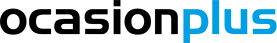

In [7]:
print(coches_llamada.content)

<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link as="font" crossorigin="" href="/hera/_next/static/media/351a934e96d2300f-s.p.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="" href="/hera/_next/static/media/e1c529c04de64b40-s.p.woff2" rel="preload" type="font/woff2"/><link as="image" href="/hera/icons/home.svg" rel="preload"/><link as="image" href="/hera/icons/filters/car.svg" rel="preload"/><link as="image" href="/hera/icons/filters/motorbike.svg" rel="preload"/><link as="image" href="/hera/icons/favourite.svg" rel="preload"/><link as="image" href="/hera/icons/B.svg" rel="preload"/><link as="image" href="/hera/icons/ribbon.svg" rel="preload"/><link as="image" href="/hera/icons/ECO.svg" rel="preload"/><link as="image" href="/hera/icons/C.svg" rel="preload"/><link as="image" href="/hera/icons/ribbon-reservado.svg" rel="preload"/><link as="image" fetchpriority="high" href="/hera/ic
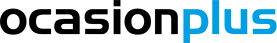

In [8]:
coches_soup= BeautifulSoup(coches_llamada.content, 'html.parser')
print(coches_soup)

In [120]:
nombres = []
nombres_coches = coches_soup.find_all("h2", {"class" : "cardVehicle_column_text__EvQkB"})

for nombre in nombres_coches:
        nombres.append(nombre.text)
    

In [121]:
len(nombres)

20

In [21]:
precios_coches=[]
precios=coches_soup.findAll("div", {"class": "cardVehicle_amount__JGeQe"})
for precio in precios:
    precios_coches.append(precio.text)
    


In [22]:
print(precios_coches)

['8.990€8.990€', '25.500€22.999€', '23.450€21.318€', '18.350€16.681€', '23.490€21.354€', '8.250€7.500€', '11.450€10.409€', '12.950€11.772€', '23.990€21.809€', '8.990€8.990€', '6.450€6.450€', '11.350€10.318€', '16.900€15.363€', '15.990€14.536€', '18.900€17.181€', '58.950€53.590€', '22.500€20.454€', '16.990€15.445€', '11.350€10.318€', '16.890€15.354€']


In [131]:
precios_normal = []
precios_oferta = []

for i in precios_coches:
    division = i.split("€")
    #print(division)
    #print("............")
    if division[0] == division[1]:
        precios_oferta.append(" ")
        precios_normal.append(division[0])

    else: 
        precios_normal.append(division[0])
        precios_oferta.append(division[1])

In [132]:
len(precios_normal)

20

In [133]:
len(precios_oferta)

20

In [50]:
kilometro_coche=[]
kilometro=coches_soup.findAll("span",{"class":"characteristics_elements__Mb1S_"})
for i in kilometro:
    if "Km" in i.text:
        kilometro_coche.append(i.text)


In [135]:
tabla_final={"coche":nombres,"precio_rebajado":precios_oferta,"precio_original":precios_normal,"kilometros":kilometro_coche}

In [138]:
df = pd.DataFrame(tabla_final)
df.columns = ["coche", "precio_rebajado", "precio_original", "kilometros"]

In [139]:
df

,coche,precio_rebajado,precio_original,kilometros
0,Opel Insignia2.0 CDTI ecoFLEX Start&Stop 120 B...,,8.990,137.756 Km
1,Toyota C-HR2.0 180H Advance,22.999,25.500,80.267 Km
2,Abarth 500595 Competizione 1.4 16v T-Jet 132kW E6,21.318,23.450,55.895 Km
3,Mazda Mazda21.5 GE 66kW (90CV) Black Tech Edit...,16.681,18.350,42.378 Km
4,BMW X1sDrive18dA Business,21.354,23.490,80.055 Km
5,Hyundai i301.6 CRDi 110cv Tecno,7.500,8.250,197.427 Km
6,Opel Astra1.6 CDTi 100kW Excellence Auto 16 ST,10.409,11.450,155.283 Km
7,Volkswagen PoloA-Polo Plus 1.2 TSI 66kW(90CV) BMT,11.772,12.950,67.910 Km
8,Volkswagen T-RocSport 2.0 TDI 110kW (150CV) 4 ...,21.809,23.990,98.353 Km
9,Volkswagen Polo1.6 TDI 90cv Advance,,8.990,139.886 Km
